## Question 12 - NMF

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from time import time
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
import pickle
import joblib
from joblib import dump, load

import numpy as np
np.random.seed(42)
import random
random.seed(42)

In [3]:
dataset_all = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

In [9]:
count_vect = CountVectorizer(min_df = 3, stop_words = 'english')

X_all = count_vect.fit_transform(dataset_all.data)

tfidf_transformer = TfidfTransformer()
X_tfidf_all = tfidf_transformer.fit_transform(X_all)
print(X_tfidf_all.shape)

(18846, 52295)


In [4]:
pickle_in = open("tfidf_all","rb")
X_tfidf_all = pickle.load(pickle_in)
pickle_in.close()

In [ ]:
nmf_homo_score = []
nmf_comp_score = []
nmf_v_measure = []
nmf_adj_rand = []
nmf_mi_score = []

In [10]:
dim = [1, 3, 10, 50, 300]

for d in dim:
    print("dimension r is ", d)
    nmf = NMF(n_components=d, init='random', random_state=0)
    X_nmf_all = nmf.fit_transform(X_tfidf_all)
    kmeans_clf = KMeans(n_clusters=20, random_state=0, max_iter=1500, n_init = 50,n_jobs=-1)
    
    t0 = time()
    kmeans_clf.fit(X_nmf_all)
    print("done in %0.3fs" % ((time() - t0)/60.0))
    
    dump(kmeans_clf, 'q12_kmeans_nmf_r_%d.joblib' % (d))
    
    nmf_homo_score.append(homogeneity_score(dataset_all.target, kmeans_clf.labels_))
    nmf_comp_score.append(completeness_score(dataset_all.target, kmeans_clf.labels_))
    nmf_v_measure.append(v_measure_score(dataset_all.target, kmeans_clf.labels_))
    nmf_adj_rand.append(adjusted_rand_score(dataset_all.target, kmeans_clf.labels_))
    nmf_mi_score.append(adjusted_mutual_info_score(dataset_all.target, kmeans_clf.labels_))

dimension r is  1
done in 0.181s
dimension r is  3


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


done in 0.378s
dimension r is  10


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


done in 0.236s
dimension r is  50


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


done in 0.237s
dimension r is  300


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


done in 0.977s


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [11]:
dim = [2, 3, 20, 100]

for d in dim:
    print("dimension r is ", d)
    nmf = NMF(n_components=d, init='random', random_state=0)
    X_nmf_all = nmf.fit_transform(X_tfidf_all)
    kmeans_clf = KMeans(n_clusters=20, random_state=0, max_iter=1500, n_init = 50,n_jobs=-1)
    
    kmeans_clf.fit(X_nmf_all)
    
    dump(kmeans_clf, 'q12_kmeans_nmf_r_%d.joblib' % (d))
    
    nmf_homo_score.append(homogeneity_score(dataset_all.target, kmeans_clf.labels_))
    nmf_comp_score.append(completeness_score(dataset_all.target, kmeans_clf.labels_))
    nmf_v_measure.append(v_measure_score(dataset_all.target, kmeans_clf.labels_))
    nmf_adj_rand.append(adjusted_rand_score(dataset_all.target, kmeans_clf.labels_))
    nmf_mi_score.append(adjusted_mutual_info_score(dataset_all.target, kmeans_clf.labels_))

dimension r is  2


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


dimension r is  3


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


dimension r is  20


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


dimension r is  100


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [12]:
dim = [1, 3, 10, 50, 300, 2, 3, 20, 100]

In [13]:
print("For nmf:")
print("Best r by nmf_homo_score is", dim[np.argmax(np.array(nmf_homo_score))])
print("Best r by nmf_comp_score is",dim[np.argmax(np.array(nmf_comp_score))])
print("Best r by nmf_v_measure is",dim[np.argmax(np.array(nmf_v_measure))])
print("Best r by nmf_adj_rand is",dim[np.argmax(np.array(nmf_adj_rand))])
print("Best r by nmf_mi_score is",dim[np.argmax(np.array(nmf_mi_score))])

For nmf:
Best r by nmf_homo_score is 10
Best r by nmf_comp_score is 10
Best r by nmf_v_measure is 10
Best r by nmf_adj_rand is 10
Best r by nmf_mi_score is 10


In [15]:
print (nmf_homo_score)

[0.02805059089341966, 0.2028930510058648, 0.30334453193107397, 0.18846712034123744, 0.09028436843583972, 0.16794473282116706, 0.2028930510058648, 0.24918361017847462, 0.16182356254058491]


## Transformations

In [17]:
print ("Using best r = 10")

Using best r = 10


In [6]:
def get_measures(y, kmeans_clf):
    nmf_homo_score = homogeneity_score(y, kmeans_clf.labels_)
    nmf_comp_score = completeness_score(y, kmeans_clf.labels_)
    nmf_v_measure=v_measure_score(y, kmeans_clf.labels_)
    nmf_adj_rand=adjusted_rand_score(y, kmeans_clf.labels_)
    nmf_mi_score=adjusted_mutual_info_score(y, kmeans_clf.labels_)
    return [nmf_homo_score, nmf_comp_score, nmf_v_measure, nmf_adj_rand, nmf_mi_score]

### NMF, Unit Variance

In [5]:
r_try = [5, 10, 20]
results = []
results_labels = []
results_measures = ["nmf_homo_score", "nmf_comp_score", "nmf_v_measure", "nmf_adj_rand", "nmf_mi_score"]

In [6]:
for d in r_try:
    nmf = NMF(n_components=d, init='random', random_state=0)
    X_nmf_best = nmf.fit_transform(X_tfidf_all)

    scaler = StandardScaler(with_mean = False, with_std =True)
    X_nmf_unit = scaler.fit_transform(X_nmf_best)
    kmeans_clf = KMeans(n_clusters=20, random_state=0, max_iter=1500, n_init=50, n_jobs=-1)
    y_pred_nmf_unit = kmeans_clf.fit_predict(X_nmf_unit)
    results.append(get_measures(dataset_all.target, kmeans_clf))
    results_labels.append("r=%d unit" % (d))
    dump(kmeans_clf, 'q12_kmeans_nmf_unit_r_%d.joblib' % (d))

    c = 0.01
    X_nmf_f_sign = np.sign(X_nmf_best) 
    X_nmf_f = X_nmf_f_sign.dot(np.log(np.linalg.norm(X_nmf_best)+c) - np.log(c))
    kmeans_clf = KMeans(n_clusters=20, random_state=0, max_iter  = 1500, n_init = 50, n_jobs=-1)
    y_pred_nmf_fsign = kmeans_clf.fit_predict(X_nmf_f)
    results.append(get_measures(dataset_all.target, kmeans_clf))
    results_labels.append("r=%d fsign" % (d))
    dump(kmeans_clf, 'q12_kmeans_nmf_fsign_r_%d.joblib' % (d))

    #combine both - Unit var first then log
    X_nmf_f_sign = np.sign(X_nmf_unit)
    X_nmf_unit_f = X_nmf_f_sign.dot(np.log(np.linalg.norm(X_nmf_unit)+c) - np.log(c))
    kmeans_clf = KMeans(n_clusters=20, random_state=0, max_iter=1500, n_init=50, n_jobs=-1)
    y_pred_nmf_unit_fsign = kmeans_clf.fit_predict(X_nmf_unit_f)
    results.append(get_measures(dataset_all.target, kmeans_clf))
    results_labels.append("r=%d unit fsign" % (d))
    dump(kmeans_clf, 'q12_kmeans_nmf_unit_fsign_r_%d.joblib' % (d))

    #combine both -Log first then Unit var 
    X_nmf_f_sign = np.sign(X_nmf_best)
    X_nmf_f = X_nmf_f_sign.dot(np.log(np.linalg.norm(X_nmf_best)+c) - np.log(c))

    scaler = StandardScaler(with_mean = False, with_std =True)
    X_nmf_f_unit = scaler.fit_transform(X_nmf_f)
    kmeans_clf = KMeans(n_clusters=20, random_state=0, max_iter=1500, n_init=50, n_jobs=-1)
    y_pred_nmf_fsign_unit = kmeans_clf.fit_predict(X_nmf_f_unit)
    results.append(get_measures(dataset_all.target, kmeans_clf))
    results_labels.append("r=%d fsign unit" % (d))
    dump(kmeans_clf, 'q12_kmeans_nmf_fsign_unit_r_%d.joblib' % (d))

C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The

In [32]:
best = np.argmax(np.array(results),axis=0)

for i in range(len(best)):
    print (results_measures[i]," : ", results_labels[best[i]], results[best[i]][i])

nmf_homo_score  :  r=10 unit 0.301469781212141
nmf_comp_score  :  r=20 unit 0.3657162906588827
nmf_v_measure  :  r=20 unit 0.3201180377046113
nmf_adj_rand  :  r=10 unit 0.1115350853744247
nmf_mi_score  :  r=10 unit 0.2992055446662649


In [40]:
for i in range(len(results_labels)):
    print (i, ": ", results_labels[i])

0 :  r=5 unit
1 :  r=5 fsign
2 :  r=5 unit fsign
3 :  r=5 fsign unit
4 :  r=10 unit
5 :  r=10 fsign
6 :  r=10 unit fsign
7 :  r=10 fsign unit
8 :  r=20 unit
9 :  r=20 fsign
10 :  r=20 unit fsign
11 :  r=20 fsign unit


In [41]:
results[4]

[0.301469781212141,
 0.33751171296374466,
 0.3184742694150936,
 0.1115350853744247,
 0.2992055446662649]

In [10]:
best_result = []
dataset_all = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)
pickle_in = open("tfidf_all","rb")
X_tfidf_all = pickle.load(pickle_in)
pickle_in.close()

nmf = NMF(n_components=10, init='random', random_state=0)
X_nmf_best = nmf.fit_transform(X_tfidf_all)

scaler = StandardScaler(with_mean = False, with_std =True)
X_nmf_unit = scaler.fit_transform(X_nmf_best)

In [ ]:
kmeans_clf = KMeans(n_clusters=20, random_state=0, max_iter=5000, n_init=100, n_jobs=-1)
y_pred_nmf_unit = kmeans_clf.fit_predict(X_nmf_unit)
best_result.append(get_measures(dataset_all.target, kmeans_clf))
dump(kmeans_clf, 'q12_kmeans_nmf_unit_r_10_iter_5000_init_100.joblib')

In [11]:
kmeans_clf = load('q12_kmeans_nmf_unit_r_10_iter_5000_init_100.joblib')
y_pred_nmf_unit = kmeans_clf.predict(X_nmf_unit)

In [17]:
def plot_clustering_results_vs_groundtruth(y, y_pred, title):
        svd = TruncatedSVD(n_components=2, random_state=0)
        X_nmf_2d = svd.fit_transform(X_tfidf_all)
        plt.figure(figsize=(12, 12))
        plt.subplot(221)
        plt.scatter(X_nmf_2d[:, 0], X_nmf_2d[:, 1], c=y_pred)
        plt.title(title)

        plt.subplot(222)
        plt.scatter(X_nmf_2d[:, 0], X_nmf_2d[:, 1], c=y)
        plt.title("Ground truth class label")

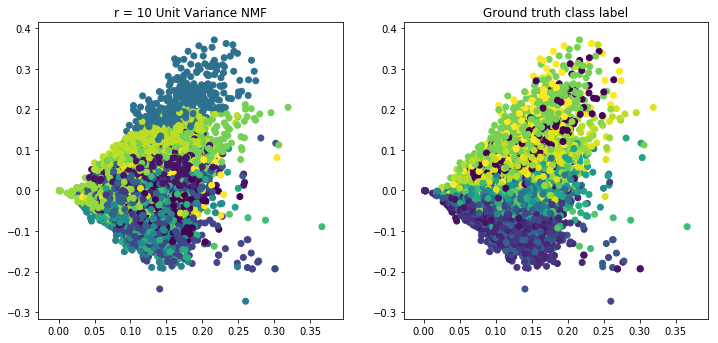

In [18]:
plot_clustering_results_vs_groundtruth(dataset_all.target, y_pred_nmf_unit, "r = 10 Unit Variance NMF")

In [24]:
best_result_default = []
dataset_all = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)
pickle_in = open("tfidf_all","rb")
X_tfidf_all = pickle.load(pickle_in)
pickle_in.close()

nmf = NMF(n_components=100, random_state=0)
X_nmf_best = nmf.fit_transform(X_tfidf_all)

scaler = StandardScaler(with_mean = False, with_std =True)
X_nmf_unit = scaler.fit_transform(X_nmf_best)

KeyboardInterrupt: 

In [ ]:
kmeans_clf = KMeans(n_clusters=20, random_state=0, max_iter=5000, n_init=100, n_jobs=-1)
y_pred_nmf_unit = kmeans_clf.fit_predict(X_nmf_unit)
best_result_default.append(get_measures(dataset_all.target, kmeans_clf))
dump(kmeans_clf, 'q12_kmeans_nmf_unit_r_10_iter_5000_init_100_nmf_default.joblib')
print (best_result_default)

In [ ]:
kmeans_clf = load('q12_kmeans_nmf_unit_r_300_iter_5000_init_100_nmf_default.joblib')
y_pred_nmf_unit = kmeans_clf.predict(X_nmf_unit)